In [10]:
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import os
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

SyntaxError: invalid syntax (278154748.py, line 12)

In [2]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './datasets'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 451
테스트 데이터셋 크기: 10
클래스: ['.ipynb_checkpoints', '정상', '축정렬불량']


/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: U

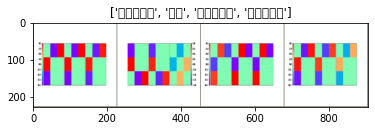

In [3]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [4]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features

model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [5]:
num_epochs = 50
model.train()
start_time = time.time()


for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.


    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 0.6557 Acc: 75.6098% Time: 34.6335s
#1 Loss: 0.8064 Acc: 69.6231% Time: 70.6647s
#2 Loss: 0.6297 Acc: 76.4967% Time: 106.8774s
#3 Loss: 0.5846 Acc: 77.8270% Time: 143.1779s
#4 Loss: 0.5479 Acc: 79.3792% Time: 177.5076s
#5 Loss: 0.5675 Acc: 77.1619% Time: 212.9999s
#6 Loss: 0.5237 Acc: 79.3792% Time: 248.2517s
#7 Loss: 0.5424 Acc: 79.6009% Time: 283.7851s
#8 Loss: 0.5329 Acc: 79.8226% Time: 320.8497s
#9 Loss: 0.5255 Acc: 81.1530% Time: 356.0933s
#10 Loss: 0.5368 Acc: 78.4922% Time: 391.8777s
#11 Loss: 0.5694 Acc: 78.2705% Time: 429.4328s
#12 Loss: 0.5850 Acc: 79.8226% Time: 464.0401s
#13 Loss: 0.5053 Acc: 80.4878% Time: 501.0242s
#14 Loss: 0.4817 Acc: 80.9313% Time: 536.9992s
#15 Loss: 0.4961 Acc: 79.6009% Time: 571.6836s
#16 Loss: 0.4997 Acc: 80.9313% Time: 608.0582s
#17 Loss: 0.4939 Acc: 82.0399% Time: 643.8337s
#18 Loss: 0.4658 Acc: 80.4878% Time: 679.0846s
#19 Loss: 0.4973 Acc: 79.8226% Time: 712.7771s
#20 Loss: 0.4693 Acc: 82.2616% Time: 750.0653s
#21 Loss: 0.4696 Acc: 80.

[예측 결과: 정상] (실제 정답: 정상)


/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/sda1/anaconda3/envs/cnn-autoencoder/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


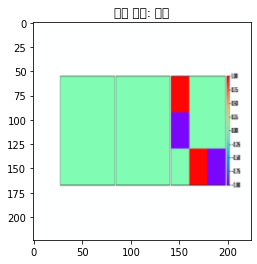

[예측 결과: 축정렬불량] (실제 정답: 축정렬불량)


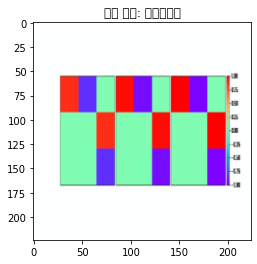

[예측 결과: 축정렬불량] (실제 정답: 정상)


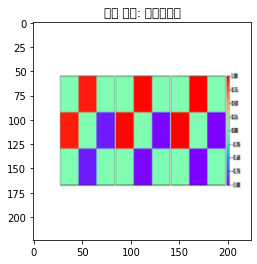

[Test Phase] Loss: 0.8754 Acc: 60.0000% Time: 0.6401s


In [6]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))